# Data Streaming Invasive Alien Species Digital Twin Outputs

**Author**: [Taimur Khan](https://www.ufz.de/index.php?en=49404), Helmholtz Centre for Environmental Research - UFZ, Germany

**Date**: 2025-02-20

## Purpose

The purpose of this notebook is to demonstrate how to stream the outputs of the Invasive Alien Species Digital Twin from the [BioDT OPenDAP service](http://opendap.biodt.eu). The outputs are streamed in real-time using `rioxarray` and visualized using the `matplotlib` library.

The notebook has been parameterized using Jupyter Widgets to allow the user to select the desired habitat, climate model, climate scenario, and time period parameters for querying the desired dataset. 

The notebook is divided into the following sections:
- [1. Import Libraries](#1.-Import-Libraries)
- [2. Define Parameters](#2.-Define-Parameters)
- [3. Query URL](#3.-Query-Data)
- [4. Stream Data](#4.-Stream-Data)
- [5. Visualize Data](#5.-Visualize-Data)
- [6. Download Data (optional)](#6.-Download)

## 1. Import Libraries

If you do not have the required libraries installed, you can install them by running the following cell:

In [ ]:
!pip install rioxarray matplotlib pandas matplotlib_scalebar

Otherwise just import the following:

In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import rioxarray
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches

## 2. Define Parameters
 
### Select Habitat Type

In [2]:
# Load the CSV file
url = "http://opendap.biodt.eu/ias-pdt/0/outputs/key.csv"
df_hab = pd.read_csv(url)

# Create a dropdown widget
habitat_dropdown = widgets.Dropdown(
    options=df_hab[
        "hab_name"
    ].unique(),  # Replace 'column_name' with the actual column name you want to use
    description="Select:",
    disabled=False,
)
 
# Display the dropdown widget
print("Select a habitat type from the dropdown list:")
display(habitat_dropdown)

Select a habitat type from the dropdown list:


Dropdown(description='Select:', options=('forests', 'open_forests', 'scrub', 'natural_grasslands', 'human_main…

In [3]:
# Get the corresponding value for hab_abb for the selected hab_name
selected_hab_abb = df_hab[df_hab["hab_name"] == habitat_dropdown.value][
    "hab_abb"
].values[0]
print(f"Selected Habitat Abbreviation: {selected_hab_abb}")

Selected Habitat Abbreviation: 3


### Select Climate Model, Scenario, and Species

In [4]:
# Load the remote txt file as dataframe
url_txt = f"http://opendap.biodt.eu/ias-pdt/0/outputs/hab{selected_hab_abb}/predictions/Prediction_Summary_Shiny.txt"
df_mod = pd.read_csv(url_txt, sep="\t")

# Create dropdown widgets with added space
habitat_dropdown = widgets.Dropdown(
    options=df_mod[
        "hab_name"
    ].unique(),  # Replace 'column_name' with the actual column name you want to use
    description="Habitat Type:",
    disabled=False,
    layout=widgets.Layout(margin="0 0 0 0px"),
)


climate_model_dropdown = widgets.Dropdown(
    options=df_mod["climate_model"].unique(),
    description="Climate Model:",
    disabled=False,
    layout=widgets.Layout(margin='0 0 0 0px')
)

climate_model_dropdown.options = list(climate_model_dropdown.options) + ["Ensemble"]


climate_scenario_dropdown = widgets.Dropdown(
    options=df_mod["climate_scenario"].unique(),
    description="Climate Scenario:",
    disabled=False,
    layout=widgets.Layout(margin='0 0 0 0px')
)

time_period_dropdown = widgets.Dropdown(
    options=df_mod["time_period"].unique(),
    description="Time Period:",
    disabled=False,
    layout=widgets.Layout(margin='0 0 0 0px')
)

species_name_dropdown = widgets.Dropdown(
    options=df_mod["species_name"].dropna().unique(),
    description="Species Name:",
    disabled=False,
) 

# Display the dropdown widgets
display(
    habitat_dropdown,
    climate_model_dropdown,
    climate_scenario_dropdown,
    time_period_dropdown,
    species_name_dropdown
)

Dropdown(description='Habitat Type:', layout=Layout(margin='0 0 0 0px'), options=('Scrub',), value='Scrub')

Dropdown(description='Climate Model:', layout=Layout(margin='0 0 0 0px'), options=('Current', 'GFDL-ESM4', 'IP…

Dropdown(description='Climate Scenario:', layout=Layout(margin='0 0 0 0px'), options=('Current', 'ssp126', 'ss…

Dropdown(description='Time Period:', layout=Layout(margin='0 0 0 0px'), options=('1981-2010', '2011-2040', '20…

Dropdown(description='Species Name:', options=('Trachycarpus fortunei', 'Washingtonia robusta', 'Amaryllis bel…

## 3. Query URL

In [5]:
hab_num = df_mod[df_mod["hab_name"] == habitat_dropdown.value]["hab_abb"].values[0]
clim_mod = climate_model_dropdown.value
clim_sce = climate_scenario_dropdown.value
time_per = time_period_dropdown.value
species = species_name_dropdown.value

tif_path_mean = df_mod[
    (df_mod["hab_abb"] == hab_num) &
    (df_mod["climate_model"] == clim_mod) &
    (df_mod["climate_scenario"] == clim_sce) &
    (df_mod["time_period"] == time_per) &
    (df_mod["species_name"] == species)
]["tif_path_mean"].values[0]

tif_path_sd = df_mod[
    (df_mod["hab_abb"] == hab_num)
    & (df_mod["climate_model"] == clim_mod)
    & (df_mod["climate_scenario"] == clim_sce)
    & (df_mod["time_period"] == time_per)
    & (df_mod["species_name"] == species)
]["tif_path_sd"].values[0]

tif_path_cov = df_mod[
    (df_mod["hab_abb"] == hab_num)
    & (df_mod["climate_model"] == clim_mod)
    & (df_mod["climate_scenario"] == clim_sce)
    & (df_mod["time_period"] == time_per)
    & (df_mod["species_name"] == species)
]["tif_path_cov"].values[0]

tif_path_anomaly = df_mod[
    (df_mod["hab_abb"] == hab_num)
    & (df_mod["climate_model"] == clim_mod)
    & (df_mod["climate_scenario"] == clim_sce)
    & (df_mod["time_period"] == time_per)
    & (df_mod["species_name"] == species)
]["tif_path_anomaly"].values[0]

mean_url = f"http://opendap.biodt.eu/ias-pdt/0/outputs/hab{hab_num}/predictions/{tif_path_mean}"
sd_url = f"http://opendap.biodt.eu/ias-pdt/0/outputs/hab{hab_num}/predictions/{tif_path_sd}"
cov_url = f"http://opendap.biodt.eu/ias-pdt/0/outputs/hab{hab_num}/predictions/{tif_path_cov}"
anomaly_url = f"http://opendap.biodt.eu/ias-pdt/0/outputs/hab{hab_num}/predictions/{tif_path_anomaly}"

In [6]:
print(mean_url)
print(sd_url)
print(cov_url)
print(anomaly_url)


http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_mean.tif
http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_sd.tif
http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_cov.tif
http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/nan


## 4. Stream Data

In [7]:
# Read the TIFF file using rioxarray
data_mean = rioxarray.open_rasterio(mean_url)
data_sd = rioxarray.open_rasterio(sd_url)
data_cov = rioxarray.open_rasterio(cov_url)
if "nan" not in anomaly_url:
    data_anomaly = rioxarray.open_rasterio(anomaly_url)

In [8]:
data_mean

<xarray.DataArray (band: 1, y: 404, x: 390)>
[157560 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.635e+06 2.645e+06 ... 6.515e+06 6.525e+06
  * y            (y) float64 5.415e+06 5.405e+06 ... 1.395e+06 1.385e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  0.99995940923691
    STATISTICS_MEAN:     -9999
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   -9999
    _FillValue:          nan
    scale_factor:        1.0
    add_offset:          0.0
    long_name:           Sp_0171_mean

## 5. Visualize Data

Warning 1: HTTP response code on http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_mean.tif.msk: 502
Warning 1: HTTP response code on http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_mean.tif.MSK: 502
/opt/homebrew/lib/python3.12/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


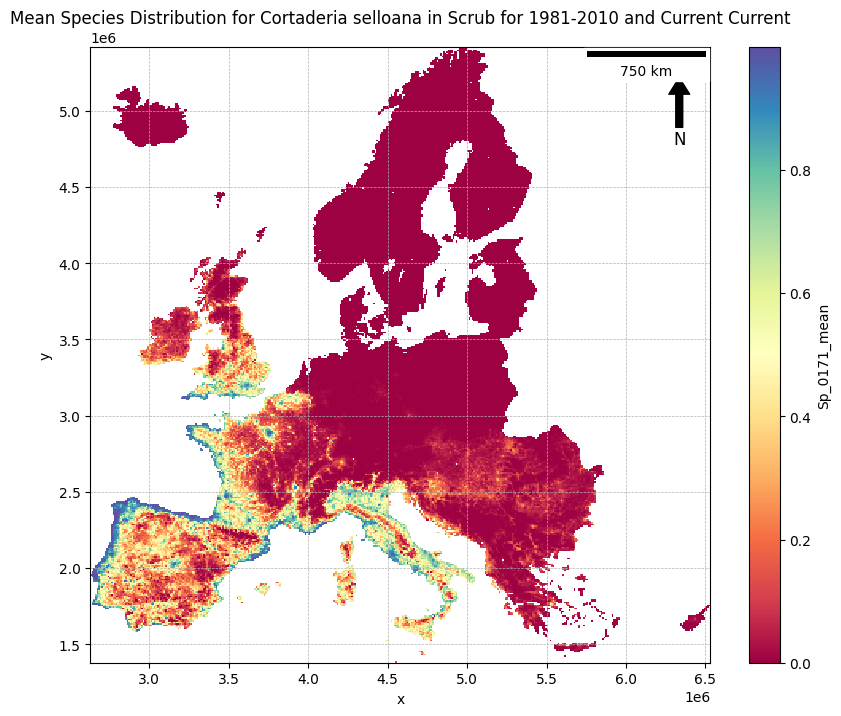

In [9]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
data_mean.plot(ax=ax, cmap="Spectral")
plt.title(f"Mean Species Distribution for {species} in {habitat_dropdown.value} for {time_per} and {clim_mod} {clim_sce}")

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5)

# Add a scale bar
scalebar = ScaleBar(1, location='upper right')  # 1 pixel = 1 unit
ax.add_artist(scalebar)

# Add a north arrow
x, y, arrow_length = 0.95, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12,
            xycoords=ax.transAxes)

plt.show()

Warning 1: HTTP response code on http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_sd.tif.msk: 502
Warning 1: HTTP response code on http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_sd.tif.MSK: 502


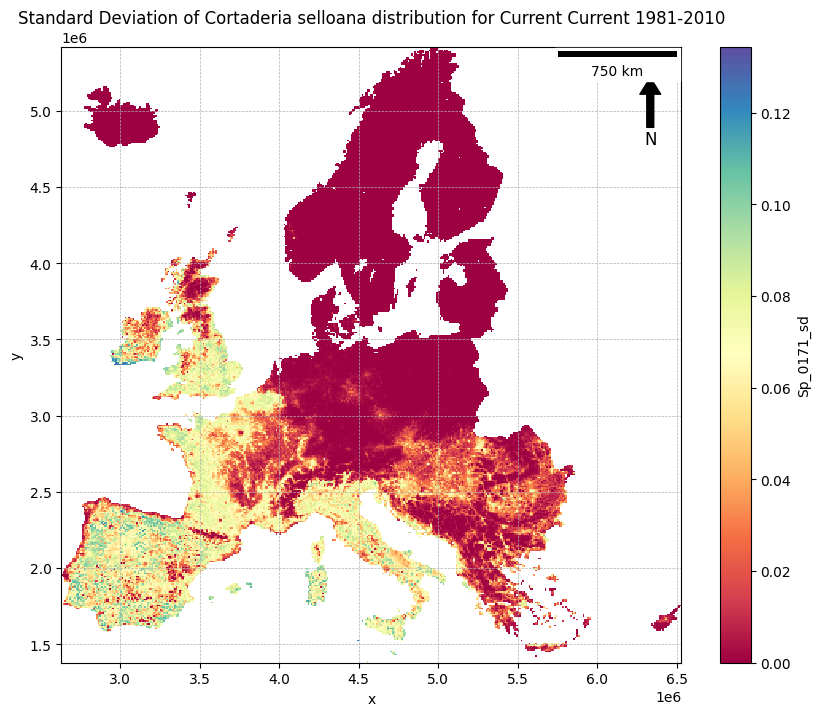

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
data_sd.plot(ax=ax, cmap="Spectral")
plt.title(f"Standard Deviation of {species} distribution for {clim_mod} {clim_sce} {time_per}")

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5)

# Add a scale bar
scalebar = ScaleBar(1, location='upper right')  # 1 pixel = 1 unit
ax.add_artist(scalebar)

# Add a north arrow
x, y, arrow_length = 0.95, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12,
            xycoords=ax.transAxes)

plt.show()

Warning 1: HTTP response code on http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_cov.tif.msk: 502
Warning 1: HTTP response code on http://opendap.biodt.eu/ias-pdt/0/outputs/hab3/predictions/Current/Sp_0171_cov.tif.MSK: 502


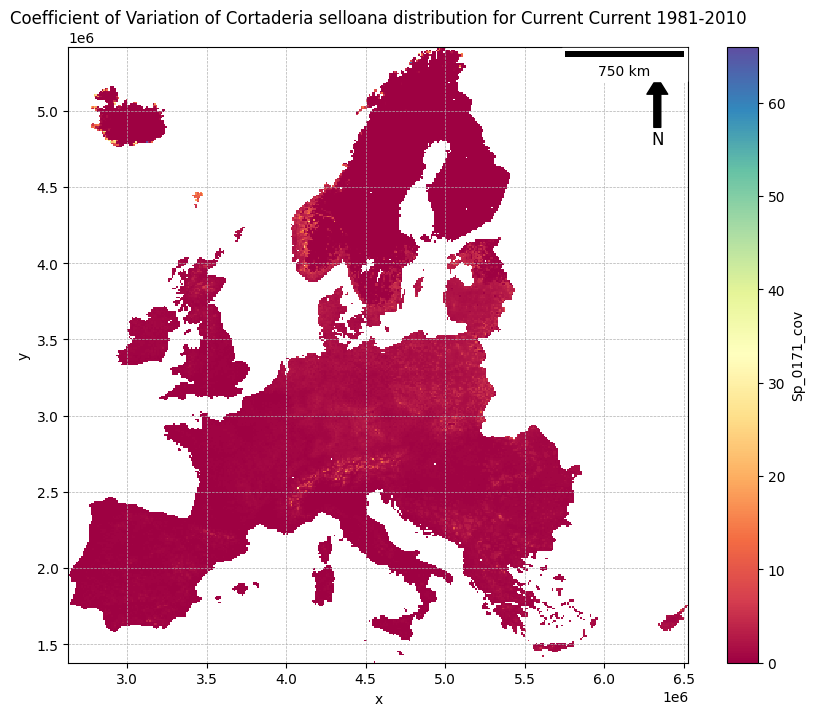

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
data_cov.plot(ax=ax, cmap="Spectral")
plt.title(f"Coefficient of Variation of {species} distribution for {clim_mod} {clim_sce} {time_per}")

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5)

# Add a scale bar
scalebar = ScaleBar(1, location='upper right')  # 1 pixel = 1 unit
ax.add_artist(scalebar)

# Add a north arrow
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12,
            xycoords=ax.transAxes)

plt.show()

In [13]:
if "nan" not in anomaly_url:
    fig, ax = plt.subplots(figsize=(10, 8))
    data_anomaly.plot(ax=ax, cmap="Spectral")
    plt.title(f"Anomaly of {species} distribution for {clim_mod} {clim_sce} {time_per}")

    # Add grid lines
    ax.grid(True, linestyle='--', linewidth=0.5)

    # Add a scale bar
    scalebar = ScaleBar(1, location='upper right')  # 1 pixel = 1 unit
    ax.add_artist(scalebar)

    # Add a north arrow
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=12,
                xycoords=ax.transAxes)

    plt.show()
else:
    print("Please select a future time period to view the anomaly map.")

Please select a future time period to view the anomaly map.


## 6. Download Data (optional)

In [14]:
import os
import requests
from ipywidgets import Text, Button, VBox

# Create a text input widget for the path
path_input = Text(
    value='.',
    placeholder='Enter the path to save files',
    description='Path:',
    disabled=False
)

# Create a button widget
download_button = Button(
    description='Download',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download files',
    icon='download'  # (FontAwesome names without the `fa-` prefix)
)

# Function to download files
def download_files(b):
    path = path_input.value
    os.makedirs(path, exist_ok=True)
    
    urls = [mean_url, sd_url, cov_url]
    if "nan" not in anomaly_url:
        urls.append(anomaly_url)
    
    print("Starting downloads...")
    for url in urls:
        filename = os.path.join(path, os.path.basename(url))
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    print("Downloads completed.")

# Attach the download function to the button
download_button.on_click(download_files)

# Display the widgets
display(VBox([path_input, download_button]))